# Step for Modeling data using Multiple Linear Regression
1. Reading, understanding and visualising the data
2. Preparing the data for modeling (train-test split, rescalling etc)
3. Training the model
4. Residual analysis
5. Predictiions and evaluation on the test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
# read the dataset
bike_sharing = pd.read_csv(r"D:\Study\upGrad\4 Machine Learning 1\Linear Regression\Linear Regression Assignment\day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Drop columns which are not pertinent to insight from the data
# List of column to drop : ['instant', 'dteday', 'casual', 'registered']

bike_sharing = bike_sharing.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


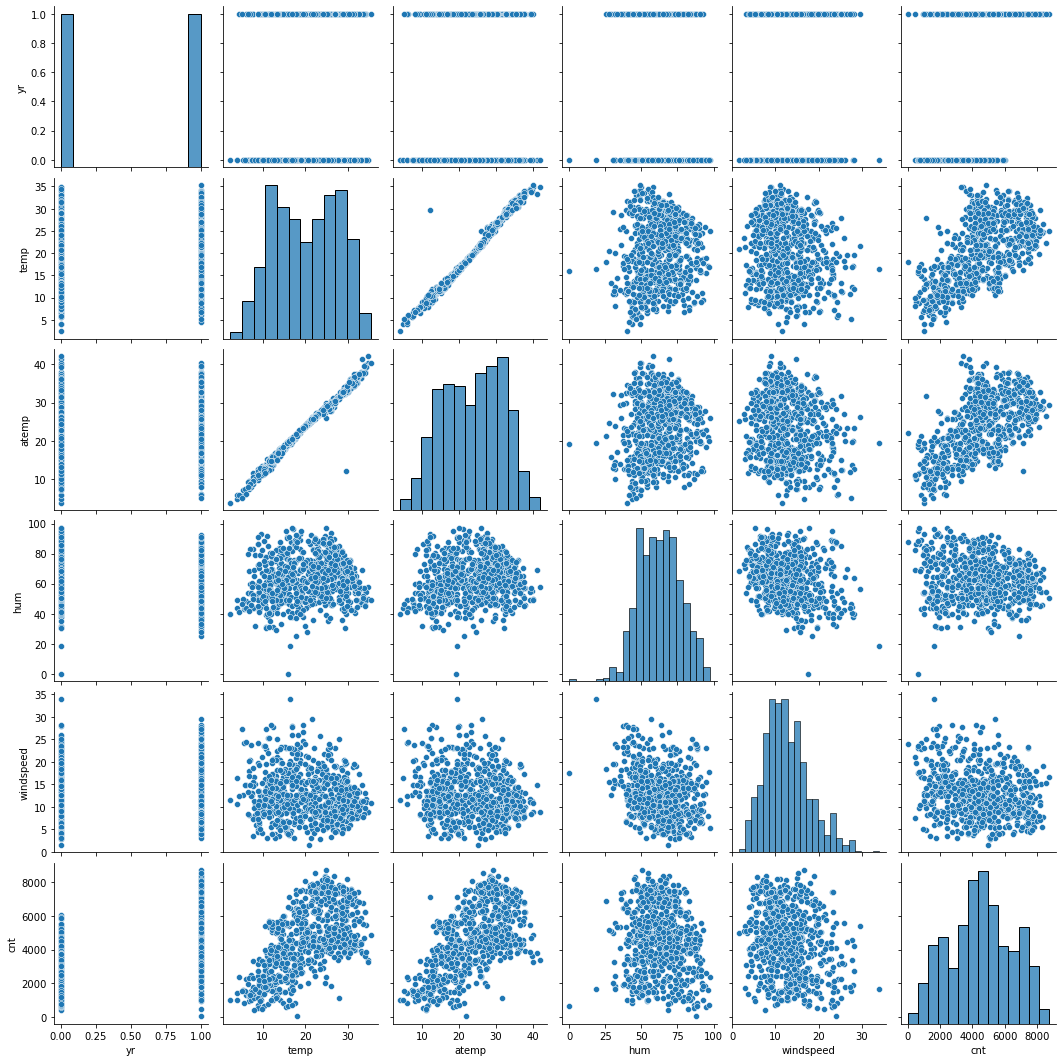

In [8]:
# visualising the numeric variables
# numeric variables in dataset: year, temperature(s), humidity, wind speed, count

sns.pairplot(bike_sharing[['yr','temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

# Observation:
# Tempuratures(s) columns have highest correlrelation with count 

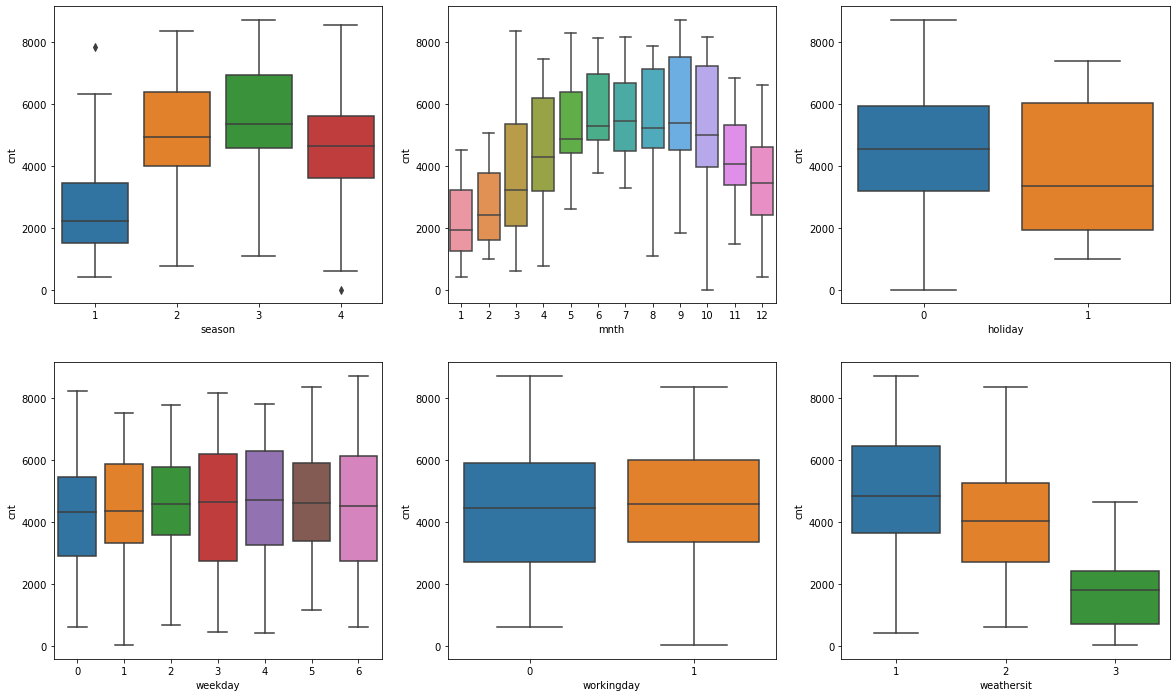

In [9]:
# visualising the categorical variables
# List of categorical data in dataset: season, mnth, holiday, weekday, workingday, weathersit

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y = 'cnt', data=bike_sharing)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y = 'cnt', data=bike_sharing)

plt.subplot(2,3,3)
sns.boxplot(x='holiday', y = 'cnt', data=bike_sharing)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y = 'cnt', data=bike_sharing)

plt.subplot(2,3,5)
sns.boxplot(x='workingday', y = 'cnt', data=bike_sharing)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y = 'cnt', data=bike_sharing)
plt.show()

# Observation:
#

## Step 2: Preparing the Data for Modeling
- Encoding:
    - Converting binary varis to 1/0
    - Other categorical vars to dummy vars
- Spliting into train and test
- Rescalling of variables

In [10]:
# Changing corresponding values to actual name in dataeset
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# weathersit : --categorical
#         1: Clear, Few clouds, Partly cloudy, Partly cloudy
#         2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#         3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#         4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike_sharing['season_type'] = bike_sharing[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bike_sharing['weathersit_type'] = bike_sharing[['weathersit']].apply(lambda x : x.map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}))
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_type,weathersit_type
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring,Mist
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring,Mist
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear


In [11]:
# creating dummy variables for season and weathersit
# dropping redudndent dummy var
# concat the dummy df with original one, in this case concatination will happen horizontally

season = pd.get_dummies(bike_sharing['season_type'], drop_first = True)
bike_sharing = pd.concat([bike_sharing,season], axis=1)

weathersit = pd.get_dummies(bike_sharing['weathersit_type'], drop_first = True)
bike_sharing = pd.concat([bike_sharing,weathersit], axis=1)

# dropping <'season',  'weathersit', 'season_type', 'weathersit_type'> for cleaning extra columns
# dropping <'mnth', 'weekday'> to reduce categories

bike_sharing = bike_sharing.drop(['season',  'weathersit', 'season_type', 'weathersit_type', 'mnth', 'weekday'], axis=1)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Splitting into train-test data sets

In [12]:
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 13)
(220, 13)


## Rescalling the Feature
    - Min-Max scaling (normalisation): Between 0 and 1

In [13]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1
111,0.0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1


In [14]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt,yr
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the Model

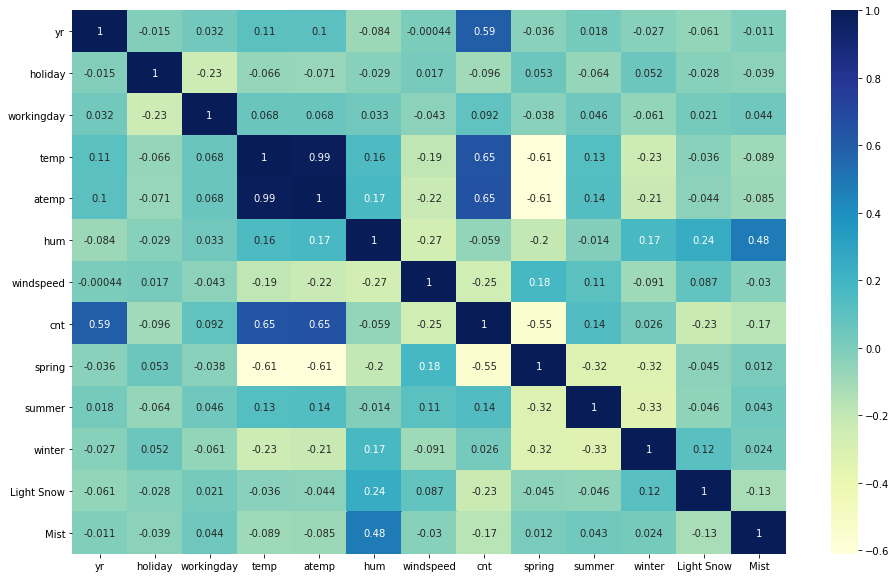

In [15]:
# heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [16]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

## Adding All Variables to the Model

In [17]:
bike_sharing.columns
# build the model with all the variables
X_train_sm =  sm.add_constant(X_train)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const         0.281067
yr            0.230338
holiday      -0.074143
workingday    0.017403
temp          0.462186
atemp         0.034510
hum          -0.140244
windspeed    -0.179702
spring       -0.075204
summer        0.042289
winter        0.087238
Light Snow   -0.240889
Mist         -0.052951
dtype: float64

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          3.27e-181
Time:                        18:20:40   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     497   BIC:                            -894.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2811      0.036      7.782      0.000       0.210       0.352
yr             0.2303      0.008     27.164      0.000       0.214       0.247
holiday       -0.0741      0.027     -2.712      0.007      -0.128      -0.020
workingday     0.0174      0.009      1.889      0.059      -0.001       0.036
temp           0.4622      0.141      3.289      0.001       0.186       0.738
atemp          0.0345      0.144      0.240      0.810      -0.248       0.317
hum           -0.1402      0.039     -3.583      0.000      -0.217      -0.063
windspeed     -0.1797      0.027     -6.561      0.000      -0.234      -0.126
spring        -0.0752      0.021     -3.603      0.000      -0.116      -0.034
summer         0.0423      0.014      2.987      0.003       0.014       0.070
winter         0.0872      0.017      5.037      0.000       0.053       0.121
Light Snow    -0.2409      0.028     -8.737      0.000      -0.295      -0.187
Mist          -0.0530      0.011     -4.832      0.000      -0.074      -0.031
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.688
Skew:                          -0.578   Prob(JB):                     2.85e-36
Kurtosis:                       5.523   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# significance (p-values)
# VIF collinearity of var with other vars

## VIF

In [19]:
# Create a df that will contains the name of all the featur variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,375.03
4,atemp,365.61
5,hum,27.35
6,windspeed,4.88
7,spring,3.84
2,workingday,3.19
9,winter,3.18
8,summer,2.36
11,Mist,2.28
0,yr,2.08


We could have:
 
  - High p-value, high VIF --> Discard
  - High-Low:
      - High p, low VIF: remove these first
      - Low p, high VIF: remove these after the ones above
  - Low p, Low VIF --> Keep

In [20]:
X = X_train.drop(['atemp'], axis=1)
# create another model
X_train_sm =  sm.add_constant(X)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const         0.280871
yr            0.230305
holiday      -0.074394
workingday    0.017394
temp          0.494915
hum          -0.139790
windspeed    -0.180968
spring       -0.074616
summer        0.042939
winter        0.088008
Light Snow   -0.241338
Mist         -0.053024
dtype: float64

In [21]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.22e-182
Time:                        18:22:06   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2809      0.036      7.786      0.000       0.210       0.352
yr             0.2303      0.008     27.190      0.000       0.214       0.247
holiday       -0.0744      0.027     -2.725      0.007      -0.128      -0.021
workingday     0.0174      0.009      1.890      0.059      -0.001       0.035
temp           0.4949      0.035     14.320      0.000       0.427       0.563
hum           -0.1398      0.039     -3.579      0.000      -0.217      -0.063
windspeed     -0.1810      0.027     -6.739      0.000      -0.234      -0.128
spring        -0.0746      0.021     -3.604      0.000      -0.115      -0.034
summer         0.0429      0.014      3.093      0.002       0.016       0.070
winter         0.0880      0.017      5.175      0.000       0.055       0.121
Light Snow    -0.2413      0.027     -8.782      0.000      -0.295      -0.187
Mist          -0.0530      0.011     -4.845      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       59.476   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.267
Skew:                          -0.571   Prob(JB):                     5.81e-36
Kurtosis:                       5.516   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,27.30
3,temp,15.16
5,windspeed,4.65
6,spring,3.77
2,workingday,3.19
8,winter,3.05
10,Mist,2.28
7,summer,2.26
0,yr,2.08
9,Light Snow,1.24


In [23]:
X = X.drop(['workingday'], axis=1)
# create another model
X_train_sm =  sm.add_constant(X)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const         0.293196
yr            0.230708
holiday      -0.085976
temp          0.495998
hum          -0.140576
windspeed    -0.182979
spring       -0.074863
summer        0.043158
winter        0.087093
Light Snow   -0.239593
Mist         -0.052191
dtype: float64

In [24]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          8.27e-183
Time:                        18:22:27   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2932      0.036      8.242      0.000       0.223       0.363
yr             0.2307      0.008     27.176      0.000       0.214       0.247
holiday       -0.0860      0.027     -3.224      0.001      -0.138      -0.034
temp           0.4960      0.035     14.316      0.000       0.428       0.564
hum           -0.1406      0.039     -3.590      0.000      -0.218      -0.064
windspeed     -0.1830      0.027     -6.802      0.000      -0.236      -0.130
spring        -0.0749      0.021     -3.606      0.000      -0.116      -0.034
summer         0.0432      0.014      3.101      0.002       0.016       0.071
winter         0.0871      0.017      5.110      0.000       0.054       0.121
Light Snow    -0.2396      0.028     -8.701      0.000      -0.294      -0.185
Mist          -0.0522      0.011     -4.761      0.000      -0.074      -0.031
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,26.98
2,temp,14.79
4,windspeed,4.64
5,spring,3.71
7,winter,3.04
9,Mist,2.28
6,summer,2.24
0,yr,2.07
8,Light Snow,1.24
1,holiday,1.04


In [26]:
X = X.drop('hum', axis=1)
# create another model
X_train_sm =  sm.add_constant(X)

# Create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const         0.222207
yr            0.234097
holiday      -0.087184
temp          0.466216
windspeed    -0.154597
spring       -0.082703
summer        0.038195
winter        0.074530
Light Snow   -0.278491
Mist         -0.074980
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.84e-181
Time:                        18:22:40   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2222      0.030      7.427      0.000       0.163       0.281
yr             0.2341      0.009     27.423      0.000       0.217       0.251
holiday       -0.0872      0.027     -3.231      0.001      -0.140      -0.034
temp           0.4662      0.034     13.698      0.000       0.399       0.533
windspeed     -0.1546      0.026     -5.942      0.000      -0.206      -0.103
spring        -0.0827      0.021     -3.959      0.000      -0.124      -0.042
summer         0.0382      0.014      2.726      0.007       0.011       0.066
winter         0.0745      0.017      4.416      0.000       0.041       0.108
Light Snow    -0.2785      0.026    -10.873      0.000      -0.329      -0.228
Mist          -0.0750      0.009     -8.291      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.56
0,yr,2.07
4,spring,1.95
5,summer,1.80
6,winter,1.61
8,Mist,1.53
7,Light Snow,1.08
1,holiday,1.04


## Step 4: Residual Analysis

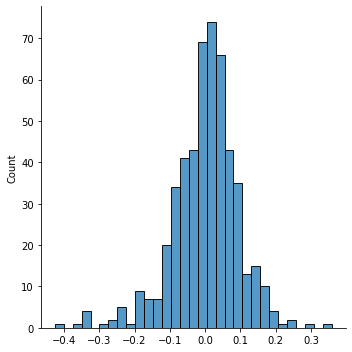

In [29]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.displot(res)

## Step 4: Predictions and Evaluation on the Test Set

In [30]:
# create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
184,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [31]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
y_test = df_test.pop('cnt')
X_test = df_test

# add a constent
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Light Snow,Mist
184,1.0,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,1.0,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [33]:
X_test_sm = X_test_sm.drop(['atemp','workingday', 'hum'], axis = 1)

# predict
y_test_pred = lr_model.predict(X_test_sm)

# evaluate
r2_score(y_true = y_test, y_pred=y_test_pred)

0.8013092375478269